In [1]:
import scipy.io
import pandas as pd
import numpy as np
import os.path
from os import path
from os.path import exists
import matplotlib.pyplot as plt
                

In [2]:
def Read(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb):
    result=[]
    for irun in range(InitialRun,FinalRun):
        filename = "./{}/data_virusprods{}_virusdiff{}_ifnprods{}_ifndiff{}_ifnprob{}_virusreduct{}_isstochastic{}_initialvirus{}_{}_{}_run{}.csv".format(path,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb,irun)                                            
        if exists(filename): 
            df = pd.read_csv("{}".format(filename))
            result.append(df)
        else:
            print("{} is missing.".format(filename))
    dftot=pd.concat(result)
    return dftot

In [5]:
def CalculateMean(df):
    header = ["step","infected.mean","infected.std","protected.mean","protected.std",
              "dead.mean","dead.std","exposure.mean","exposure.std","viruscell.mean",
              "viruscell.std","viruscontact.mean","viruscontact.std","ifncell.mean",
              "ifncell.std()","ifncontact.mean","ifncontact.std","ifn_prods"]
    
    total = []
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["step"].unique():
        df0=df[df["step"]==i]
        #print(pd.Series(df0['infected']).to_numpy())
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        data = [[i,infected.mean(),infected.std(),protected.mean(),protected.std(),
                 dead.mean(),dead.std(),exposure.mean(),exposure.std(),viruscell.mean(),
                 viruscell.std(),viruscontact.mean(),viruscontact.std(),ifncell.mean(),
                 ifncell.std(),ifncontact.mean(),ifncontact.std(),ifn_prods]]
        result = pd.DataFrame(data, columns=header)
        total.append(result)
    dfnew = pd.concat(total)
    return dfnew
    #return 0

In [10]:
def CalculateMax(df,ifn_prods,s1,s2,vnumb,Is):
    header = ["infected.maxmean","infected.maxstd","infected.argmaxmean","infected.argmaxstd","s1","s2","vnumb","ifn_prods","isstochastic"]
    
    data1 = []
    data2 = []
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        data1.append(infected.max())
        data2.append(infected.argmax())
    datamax = np.array(data1)
    datamaxmean = datamax.mean()
    datamaxstd = datamax.std()
    dataargmax = np.array(data2)
    dataargmaxmean = dataargmax.mean()
    dataargmaxstd = dataargmax.std()
    result = [[datamaxmean,datamaxstd,dataargmaxmean,dataargmaxstd,s1,s2,vnumb,ifn_prods,Is]]
    dfnew = pd.DataFrame(result, columns=header)

    return dfnew

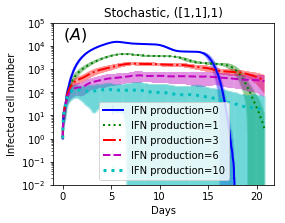

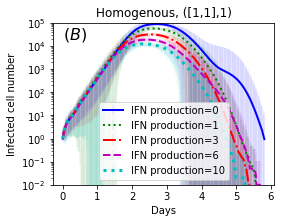

In [44]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
linestyles = ['-',':','-.',':','--']
linewidths = [2,2,2,2,3]
linecolors = ['b','g','r','c','m']


ifn_prods = [0,1,3,6,10]
initial_virus = [[1,1,1]]
isstochastic=[["stochastic",1,1000],["homogenous",0,280]]

InitialRun=0
FinalRun=100
ivirus_prods=2
ivirus_diff=1
iifn_diff=5
iifn_prob=0.1
ivirus_reduction=0.5


total =[]
for name,Is,totalstep in isstochastic:
    for s1,s2,vnumb in initial_virus:
        plt.figure(figsize=(4, 3))
        plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
        count=0
        for iifn_prods in ifn_prods:
            path = "data_py"

            df=Read(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,Is,s1,s2,vnumb)

            dfmean = CalculateMean(df)
            markers, caps, bars1=plt.errorbar(dfmean['step']/48.,dfmean['infected.mean'], yerr=dfmean['infected.std'], ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label="IFN production={}".format(iifn_prods))
            [bar1.set_alpha(0.05) for bar1 in bars1] 

            dfmax=CalculateMax(df,iifn_prods,s1,s2,vnumb,Is)
            total.append(dfmax)
            count+=1
        plt.yscale("log")
        plt.xlabel("Days")
        plt.ylabel("Infected cell number")
        plt.ylim(1e-2,1e5)
        if Is==1:
            plt.text(0, 2e4, r'$(A)$', fontdict=font)
            plt.title("Stochastic, ([1,1],1)")
        else:
            plt.text(0, 2e4, r'$(B)$', fontdict=font)
            plt.title("Homogenous, ([1,1],1)")            
        plt.legend()
        plt.savefig("./figure/cell_isstochastic{}_ifnprods_log.pdf".format(Is))

dfifnprods = pd.concat(total)

In [34]:
def plot_max_IFN_PRODS(df):
    linestyles = ['-',':','-.',':','--']
    linewidths = [2,2,2,2,3]
    linecolors = ['b','g','r','c','m']
    isstochastic=[["stochastic",1,1000],["homogenous",0,280]]
    
    #prob = [1,10]
    count=0
    plt.figure(figsize=(4, 3))
    for name,Is,totalstep in isstochastic:
        df1=df[df["isstochastic"]==Is]
        plt.errorbar(df1['ifn_prods'],df1['infected.maxmean'],yerr=df1['infected.maxstd'],marker='o',ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label=name)
        count+=1
    plt.ylabel("maximum infected cell number")
    plt.xlabel("IFN production")
    plt.yscale('log')
    plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
    plt.text(9, 0.8e5, r'$(C)$', fontdict=font)
    plt.legend()
    plt.savefig("./figure/infectedmax.pdf")
    plt.show()
    return 0

def plot_argmax_IFN_PRODS(df):
    linestyles = ['-',':','-.',':','--']
    linewidths = [2,2,2,2,3]
    linecolors = ['b','g','r','c','m']
    isstochastic=[["stochastic",1,1000],["homogenous",0,280]]
    
    #prob = [1,10]
    count=0
    plt.figure(figsize=(4, 3))
    for name,Is,totalstep in isstochastic:
        df1=df[df["isstochastic"]==Is]
        plt.errorbar(df1['ifn_prods'],df1['infected.argmaxmean']/48.,yerr=df1['infected.argmaxstd']/48.,marker='o',ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label=name)
        count+=1
    plt.ylabel("days of maximum infected cell number")
    plt.xlabel("IFN production")
    #plt.yscale('log')
    plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
    plt.text(0, 15, r'$(D)$', fontdict=font)
    plt.legend()
    plt.savefig("./figure/infectedargmax.pdf")
    plt.show()
    return 0

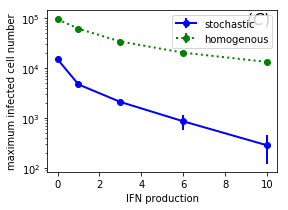

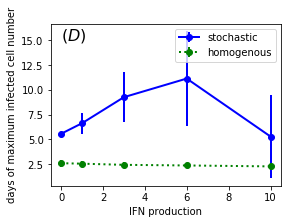

0

In [35]:
plot_max_IFN_PRODS(dfifnprods)
plot_argmax_IFN_PRODS(dfifnprods)

In [36]:
def plottracks(df,parameter,ifn_prods,s1,s2,vnumb,Is):
    #use individual df
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,
            }
    
    plt.figure(figsize=(4, 3))
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        plt.errorbar(df0['step']/48.,df0[parameter], yerr=0, ls='-',alpha=0.05,color = 'r', linewidth=1)
    plt.ylabel("{} cell numbers".format(parameter))
    plt.xlabel("Days")
    #plt.yscale('log')
    #plt.text(0.0,20000, r'$(A)$', fontdict=font)
    plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
    if Is==1:
        plt.title('Stochastic,IFN production={}'.format(ifn_prods))
    else:
        plt.title('Homogenous,IFN production={}'.format(ifn_prods))
    #plt.legend()
    plt.savefig("./figure/celltracks_isstochastic{}_{}_{}.pdf".format(Is,parameter,ifn_prods))
    plt.show()
    return 0

<Figure size 288x216 with 0 Axes>

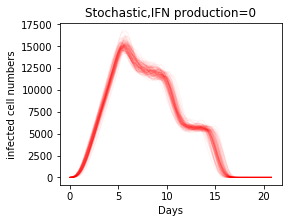

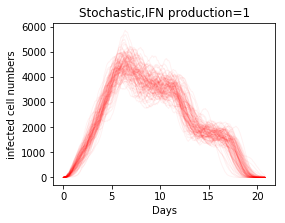

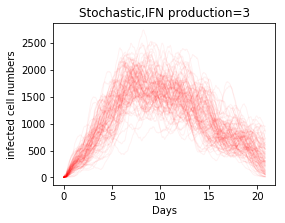

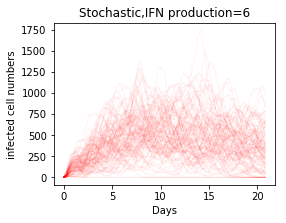

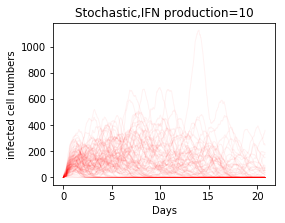

<Figure size 288x216 with 0 Axes>

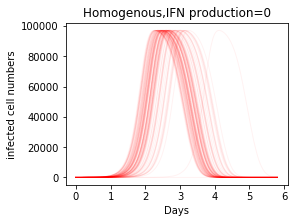

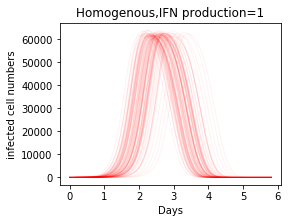

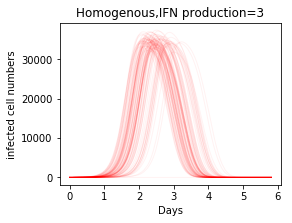

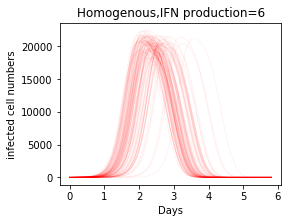

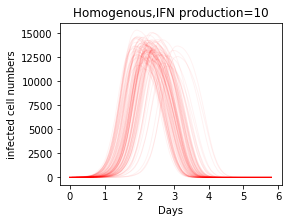

In [37]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
linestyles = ['-',':','-.',':','--']
linewidths = [2,2,2,2,3]
linecolors = ['b','g','r','c','m']


ifn_prods = [0,1,3,6,10]
initial_virus = [[1,1,1]]
isstochastic=[["stochastic",1,1000],["homogenous",0,280]]

InitialRun=0
FinalRun=100
ivirus_prods=2
ivirus_diff=1
iifn_diff=5
iifn_prob=0.1
ivirus_reduction=0.5
parameter="infected"

for name,Is,totalstep in isstochastic:
    for s1,s2,vnumb in initial_virus:
        plt.figure(figsize=(4, 3))
        plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
        for iifn_prods in ifn_prods:
            path = "data_py"
            df=Read(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,Is,s1,s2,vnumb)
            plottracks(df,parameter,iifn_prods,s1,s2,vnumb,Is)

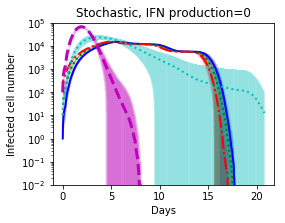

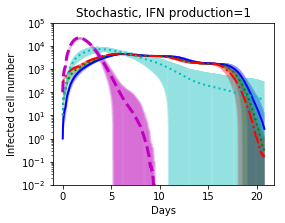

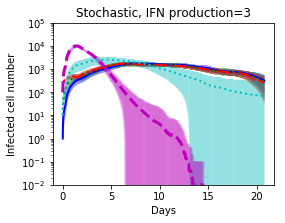

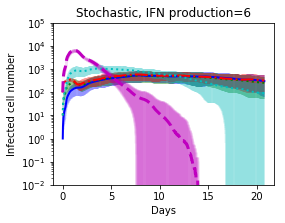

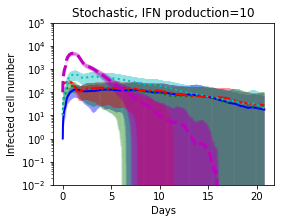

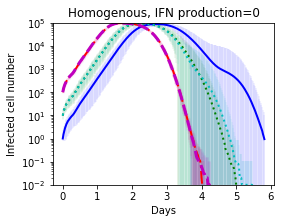

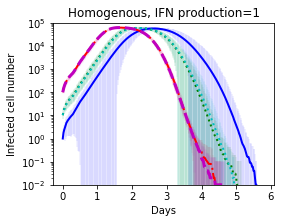

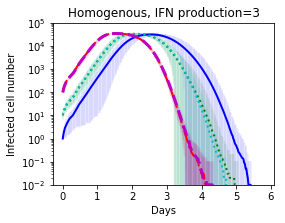

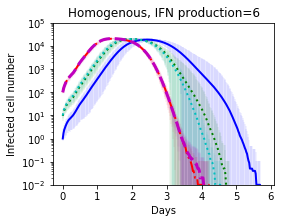

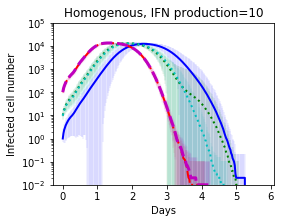

In [86]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
linestyles = ['-',':','-.',':','--']
linewidths = [2,2,2,2,3]
linecolors = ['b','g','r','c','m']


ifn_prods = [0,1,3,6,10]
initial_virus = [[1,1,1],[20,20,10],[20,20,100],[200,500,10],[200,500,100]]
isstochastic=[["stochastic",1,1000],["homogenous",0,280]]

InitialRun=0
FinalRun=100
ivirus_prods=2
ivirus_diff=1
iifn_diff=5
iifn_prob=0.1
ivirus_reduction=0.5


total =[]
for name,Is,totalstep in isstochastic:
    for iifn_prods in ifn_prods:
        plt.figure(figsize=(4, 3))
        plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
        count=0
        for s1,s2,vnumb in initial_virus:
            path = "data_py"

            df=Read(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,Is,s1,s2,vnumb)

            dfmean = CalculateMean(df)
            markers, caps, bars1=plt.errorbar(dfmean['step']/48.,dfmean['infected.mean'], yerr=dfmean['infected.std'], ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label="[{},{}], {}".format(s1,s2,vnumb))
            [bar1.set_alpha(0.05) for bar1 in bars1] 

            dfmax=CalculateMax(df,iifn_prods,s1,s2,vnumb,Is)
            total.append(dfmax)
            count+=1
        plt.yscale("log")
        plt.xlabel("Days")
        plt.ylabel("Infected cell number")
        plt.ylim(1e-2,1e5)
        if Is==1:
            #plt.text(0, 2e4, r'$(A)$', fontdict=font)
            plt.title("Stochastic, IFN production={}".format(iifn_prods))
        else:
            #plt.text(0, 2e4, r'$(B)$', fontdict=font)
            plt.title("Homogenous, IFN production={}".format(iifn_prods))            
        #plt.legend()
        plt.savefig("./figure/cell_isstochastic{}_ifnprods{}_initialvirus_log.pdf".format(Is,iifn_prods))

dfinitialvirus = pd.concat(total)

In [84]:
def plot_max_IFN_PRODS(df):
    linestyles = ['-',':','-.',':','--']
    linewidths = [2,2,2,2,3]
    linecolors = ['b','g','r','c','m']
    isstochastic=[["stochastic",1,1000],["homogenous",0,280]]

    for name,Is,totalstep in isstochastic:
        df1=df[df["isstochastic"]==Is]
        plt.figure(figsize=(4, 3))
        count=0
        for s1,s2,vnumb in initial_virus:
            df2 = df1[(df1["s1"]==s1)&(df1["s2"]==s2)&(df1["vnumb"]==vnumb)]
            plt.errorbar(df2['ifn_prods'],df2['infected.maxmean'],yerr=df2['infected.maxstd'],marker='o',ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label="[{},{}],{}".format(s1,s2,vnumb))
            count+=1
        plt.ylabel("maximum infected cell number")
        plt.xlabel("IFN production")
        plt.yscale('log')
        plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
        plt.ylim(1e2,3e5)
        
        if Is==1:
            plt.title("Stochastic")
            plt.text(1, 1e5, r'$(A)$', fontdict=font)
        else:
            plt.title("Homogeneous")
            plt.text(1, 1e5, r'$(C)$', fontdict=font)
        plt.legend()
        plt.savefig("./figure/infectedmax_isstochast{}.pdf".format(Is))
        plt.show()
    return 0

def plot_argmax_IFN_PRODS(df):
    linestyles = ['-',':','-.',':','--']
    linewidths = [2,2,2,2,3]
    linecolors = ['b','g','r','c','m']
    isstochastic=[["stochastic",1,1000],["homogenous",0,280]]
    
    for name,Is,totalstep in isstochastic:
        df1=df[df["isstochastic"]==Is]
        plt.figure(figsize=(4, 3))
        count=0
        for s1,s2,vnumb in initial_virus:
            df2 = df1[(df1["s1"]==s1)&(df1["s2"]==s2)&(df1["vnumb"]==vnumb)]
            plt.errorbar(df2['ifn_prods'],df2['infected.argmaxmean']/48.,yerr=df2['infected.argmaxstd']/48.,marker='o',ls=linestyles[count],linewidth=linewidths[count],color=linecolors[count],label="[{},{}],{}".format(s1,s2,vnumb))
            count+=1
        plt.ylabel("days of maximum infected cell number")
        plt.xlabel("IFN production")
        plt.yscale('log')
        plt.ylim(1e-1,3e1)
        plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
        if Is==1:
            plt.title("Stochastic")
            plt.text(1, 1e1, r'$(B)$', fontdict=font)
        else:
            plt.title("Homogeneous")
            plt.text(1, 1e1, r'$(D)$', fontdict=font)       
        plt.legend()
        plt.savefig("./figure/infectedargmax_isstochast{}.pdf".format(Is))
        plt.show()
    return 0

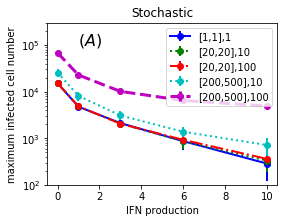

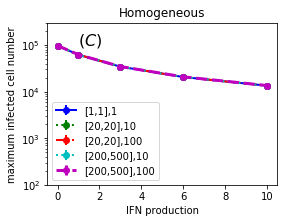

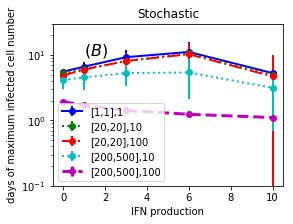

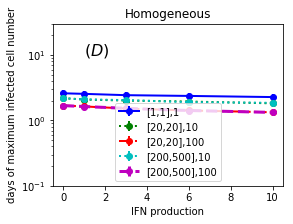

0

In [85]:
plot_max_IFN_PRODS(dfinitialvirus)
plot_argmax_IFN_PRODS(dfinitialvirus)
